**Steps:**
1. MNIST
2. DataLoader, Tranformation
3. Multilayer Neural Net, activation function
4. Loss and Optimizer
5. Training Loop (batch training)
6. Model evalution
7. GPU Support

In [19]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import torchvision
import torchvision.transforms as transforms

In [20]:
# device config
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [21]:
# hyperparameter
input_size = 784  # 28x28
hidden_size = 100
num_classes = 10
num_epochs = 2
batch_size = 100
lr = 0.001

torch.Size([100, 1, 28, 28]) torch.Size([100])
600


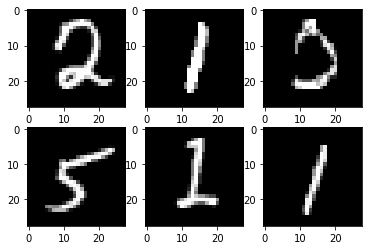

In [22]:
# MNIST
train_dataset = torchvision.datasets.MNIST(root = './data',train=True,
                                           transform =transforms.ToTensor(),
                                           download = True)

test_dataset = torchvision.datasets.MNIST(root = './data',train=False,
                                           transform =transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(dataset = train_dataset,batch_size = batch_size,
                                           shuffle = True)

test_loader = torch.utils.data.DataLoader(dataset = test_dataset,batch_size=batch_size,
                                          shuffle = False)

examples = iter(train_loader)
samples,labels = examples.next()
print(samples.shape,labels.shape)
print(len(train_loader)) # total 60000 images --> divided into batches of 100 --> total 600 train loaders

# show sample data
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.imshow(samples[i][0],cmap = 'gray')
plt.show()

In [23]:
# Model
class NeuralNet(nn.Module):
  def __init__(self,input_size,hidden_size,num_classes):
    super(NeuralNet,self).__init__()
    self.l1 = nn.Linear(input_size,hidden_size)
    self.relu = nn.ReLU()
    self.l2 = nn.Linear(hidden_size,num_classes)

  def forward(self,x):
    out = self.l1(x)
    out = self.relu(out)
    out = self.l2(out)
    return out

model = NeuralNet(input_size,hidden_size,num_classes)

# loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr = lr)

# training loop
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
  for i,(images,labels) in enumerate(train_loader):
    # 100,1,28,28
    # 100, 784
    images = images.reshape(-1,28*28).to(device)
    labels = labels.to(device)
    # forward pass
    output = model(images)
    loss = criterion(output,labels)
    # backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (i+1) % 100 == 0:
      print(f'epoch {epoch+1} / {num_epochs},step {i+1}/{n_total_steps},loss = {loss.item():.4f}' )

# test
with torch.no_grad():
  n_correct = 0
  n_samples = 0
  for images,labels in test_loader:
    images = images.reshape(-1,28*28).to(device)
    labels = labels.to(device)
    outputs = model(images)

    # value,index
    _,predictions = torch.max(outputs,1)
    n_samples += labels.shape[0]
    n_correct += (predictions == labels).sum().item()

  acc = 100.0 * n_correct / n_samples
  print(f'accuracy = {acc} %')


epoch 1 / 2,step 100/600,loss = 0.4862
epoch 1 / 2,step 200/600,loss = 0.2481
epoch 1 / 2,step 300/600,loss = 0.3532
epoch 1 / 2,step 400/600,loss = 0.2012
epoch 1 / 2,step 500/600,loss = 0.2458
epoch 1 / 2,step 600/600,loss = 0.1776
epoch 2 / 2,step 100/600,loss = 0.2460
epoch 2 / 2,step 200/600,loss = 0.1819
epoch 2 / 2,step 300/600,loss = 0.1240
epoch 2 / 2,step 400/600,loss = 0.0799
epoch 2 / 2,step 500/600,loss = 0.2020
epoch 2 / 2,step 600/600,loss = 0.1610
accuracy = 95.21 %
